In [47]:
# Import dependencies
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

print("Setup Complete")


Setup Complete


In [ ]:
#O conjunto de dados csv contém todas as menções da Dell no Twitter durante os três primeiros trimestres de 2022 (01 de janeiro a 30 de setembro), juntamente com o sentimento e as emoções de cada tweet. Ele tem cerca de 25 mil tweets junto com data, carimbo de data/hora, nome de usuário e ID do tweet, sentimento, sentiment_score, emoção e emoção_score.

#Os sentimentos e emoções foram classificados usando transformadores 🤗, confira este caderno para saber mais.

#Sentimentos: positivos, negativos e neutros
#Emoções: alegria, amor, otimismo, pessimismo, confiança, surpresa, expectativa, tristeza, raiva, nojo e medo.

#Os tweets foram copiados usando a biblioteca "snscrape", que não requer acesso à API do Twitter. Você pode seguir este bloco de anotações para saber mais sobre a eliminação de tweets usando "snscrape".

In [9]:
#importando csv
s_e_t = pd.read_csv('sentimentos_emoções_twirter.csv')

In [10]:
s_e_t

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124
...,...,...,...,...,...,...,...,...,...
24965,24965,2022-01-01 02:02:04+00:00,1477097760931336198,@ElDarkAngel2 @GamersNexus @Dell I wouldn't ev...,Eodart,negative,0.682981,anger,0.906309
24966,24966,2022-01-01 01:57:34+00:00,1477096631300415496,@kite_real @GamersNexus @Dell I didn't really ...,Eodart,positive,0.743940,joy,0.951701
24967,24967,2022-01-01 01:36:36+00:00,1477091355629432833,Hey @JoshTheFixer here it is....27 4K UHD USB-...,Corleone250,neutral,0.654463,anticipation,0.471185
24968,24968,2022-01-01 01:31:30+00:00,1477090070830141442,@bravadogaming @thewolfpena @Alienware @intel ...,MrTwistyyy,neutral,0.794049,anticipation,0.747014


In [11]:
s_e_t.rename(columns={'Unnamed': 'id', 'Datetime': 'Data_hora', 'Text':'Texto','Username':'Usuario','sentiment':'sentimento','emotion':'emogi','emotion_score':'emogi_score'},inplace=True)

In [12]:
s_e_t


,Unnamed: 0,Data_hora,Tweet Id,Texto,Usuario,sentimento,sentiment_score,emogi,emogi_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124
...,...,...,...,...,...,...,...,...,...
24965,24965,2022-01-01 02:02:04+00:00,1477097760931336198,@ElDarkAngel2 @GamersNexus @Dell I wouldn't ev...,Eodart,negative,0.682981,anger,0.906309
24966,24966,2022-01-01 01:57:34+00:00,1477096631300415496,@kite_real @GamersNexus @Dell I didn't really ...,Eodart,positive,0.743940,joy,0.951701
24967,24967,2022-01-01 01:36:36+00:00,1477091355629432833,Hey @JoshTheFixer here it is....27 4K UHD USB-...,Corleone250,neutral,0.654463,anticipation,0.471185
24968,24968,2022-01-01 01:31:30+00:00,1477090070830141442,@bravadogaming @thewolfpena @Alienware @intel ...,MrTwistyyy,neutral,0.794049,anticipation,0.747014


In [16]:
s_e_t.describe()

,Unnamed: 0,Tweet Id,sentiment_score,emogi_score
count,24970.000000,2.497000e+04,24970.000000,24970.000000
mean,12484.500000,1.526448e+18,0.782578,0.819114
std,7208.362447,2.765398e+16,0.150751,0.195378
min,0.000000,1.477082e+18,0.337307,0.125480
25%,6242.250000,1.503808e+18,0.664537,0.722941
50%,12484.500000,1.524811e+18,0.817950,0.906610
75%,18726.750000,1.550124e+18,0.912815,0.970360
max,24969.000000,1.575991e+18,0.991532,0.994312


In [20]:
media_scores_sentimento = s_e_t.groupby('sentimento')['sentiment_score'].mean()

In [26]:
media_scores_sentimento

sentimento
negative    0.817646
neutral     0.692020
positive    0.818972
Name: sentiment_score, dtype: float64

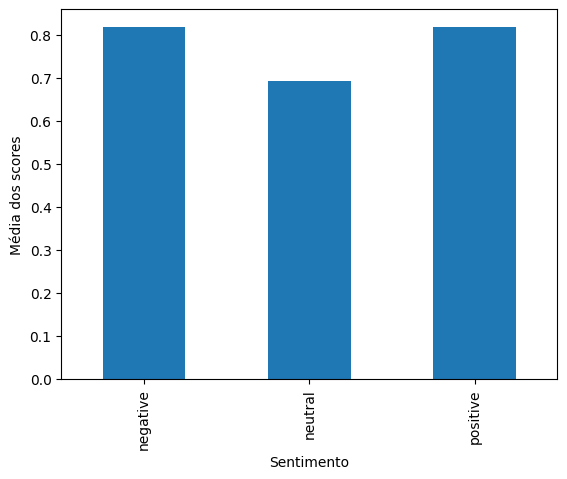

In [27]:
media_scores_sentimento.plot(kind='bar')
plt.xlabel('Sentimento')
plt.ylabel('Média dos scores')
plt.show()

In [24]:
media_scores_emogi = s_e_t.groupby('emogi')['emogi_score'].mean()

In [28]:
media_scores_emogi

emogi
anger           0.940512
anticipation    0.608328
disgust         0.738406
fear            0.831716
joy             0.888341
optimism        0.835059
sadness         0.790417
surprise        0.678751
Name: emogi_score, dtype: float64

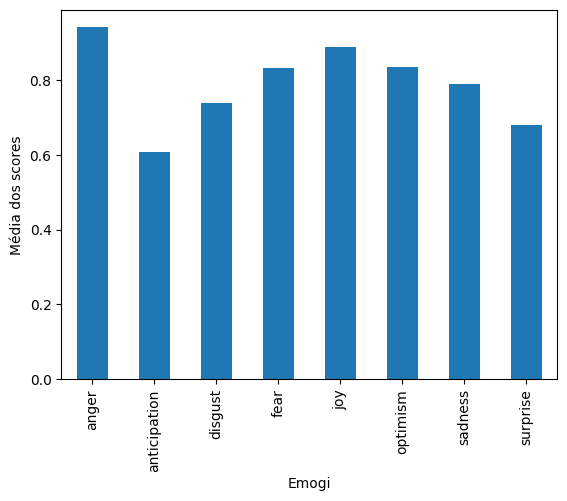

In [30]:
media_scores_emogi.plot(kind='bar')
plt.xlabel('Emogi')
plt.ylabel('Média dos scores')
plt.show()

In [33]:
correlacao = s_e_t['sentiment_score'].corr(s_e_t['emogi_score'])


In [35]:
correlacao

0.36100118227295575

In [39]:
print("Uma correlação de 0,36 indica uma correlação positiva moderada entre as colunas 'sentiment_score' e 'emogi_score'. Isso significa que há uma tendência de que, quando uma das colunas aumenta, a outra também aumente, mas essa relação não é forte o suficiente para ser considerada uma correlação positiva perfeita (que seria representada pelo valor 1)."
)

Uma correlação de 0,36 indica uma correlação positiva moderada entre as colunas 'sentiment_score' e 'emogi_score'. Isso significa que há uma tendência de que, quando uma das colunas aumenta, a outra também aumente, mas essa relação não é forte o suficiente para ser considerada uma correlação positiva perfeita (que seria representada pelo valor 1).


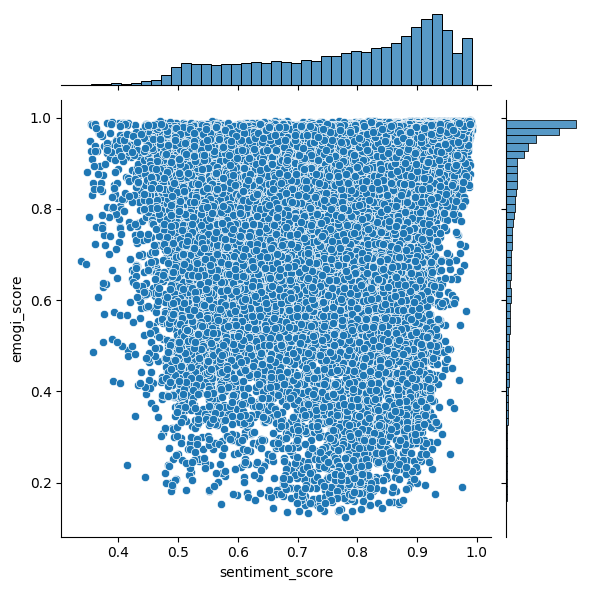

In [41]:
sns.jointplot(x='sentiment_score', y='emogi_score', data=s_e_t)


plt.show()

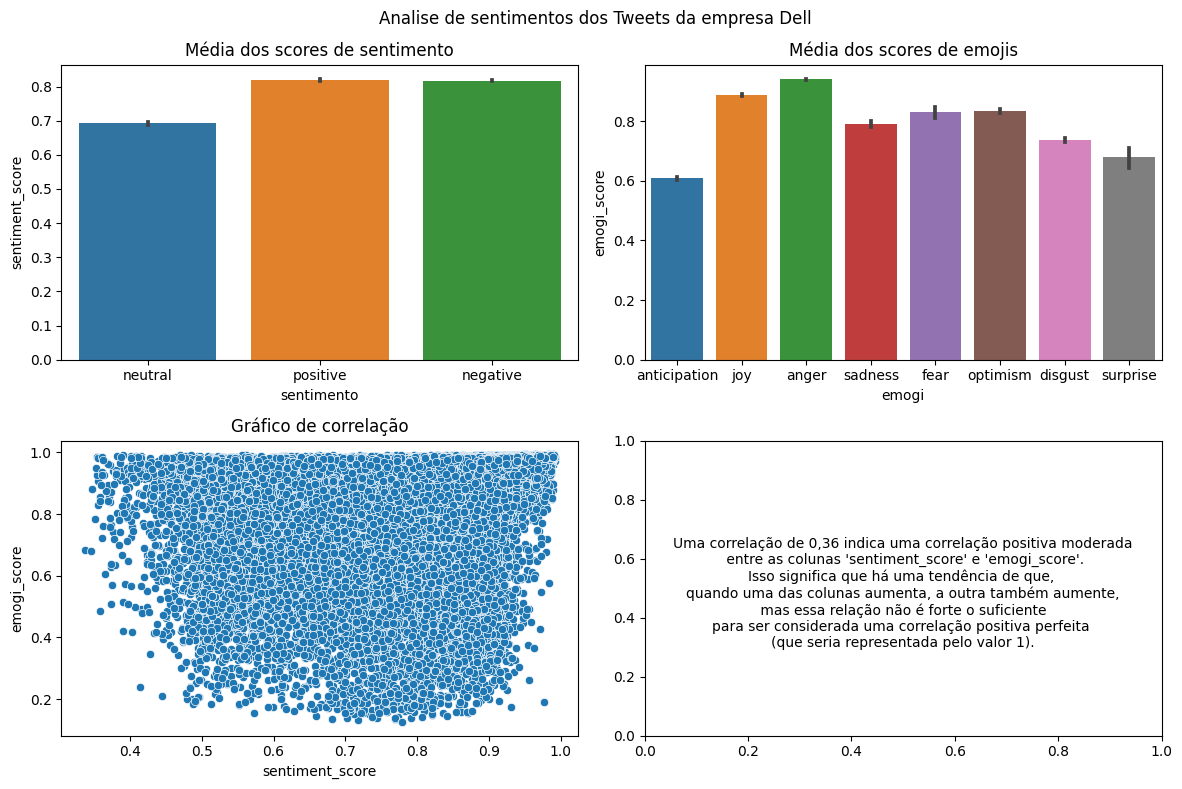

In [83]:
# Criando os gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Adicionando título
fig.suptitle('Analise de sentimentos dos Tweets da empresa Dell')

sns.barplot(x='sentimento', y='sentiment_score', data=s_e_t, ax=axs[0,0])
axs[0,0].set_title('Média dos scores de sentimento')

sns.barplot(x='emogi', y='emogi_score', data=s_e_t, ax=axs[0,1])
axs[0,1].set_title('Média dos scores de emojis')

sns.scatterplot(x='sentiment_score', y='emogi_score', data=s_e_t, ax=axs[1,0])
axs[1,0].set_title('Gráfico de correlação')

# Adicionando um comentário ao gráfico de correlação
axs[1,1].text(0.5, 0.3, "Uma correlação de 0,36 indica uma correlação positiva moderada\n entre as colunas 'sentiment_score' e 'emogi_score'.\nIsso significa que há uma tendência de que, \nquando uma das colunas aumenta, a outra também aumente,\n mas essa relação não é forte o suficiente \npara ser considerada uma correlação positiva perfeita \n(que seria representada pelo valor 1).", size=10, ha="center", transform=axs[1,1].transAxes)

# Exibindo os gráficos
plt.tight_layout()
plt.show()